In [ ]:
'''import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)

import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder'''


In [1]:
'''Unsupervised learning is used for groupin or clusterin of similar data points . The data points are unlabelled and similar ones
are clustered . for example, pictures and messages'''

'Unsupervised learning is used for groupin or clusterin of similar data points . The data points are unlabelled and similar ones\nare clustered . for example, pictures and messages'

In [76]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/Users/pruthvikbr/Documents/Kaggle/Heart_Failure_Predict/heart.csv")
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
len(df)

918

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
string_col=df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype('string')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [8]:
#Working with Categorical Columns
string_col=df.select_dtypes(include='string').columns.to_list()

In [9]:
num_columns=df.columns.to_list()
for col in string_col:
    num_columns.remove(col)
num_columns.remove('HeartDisease')

In [10]:
df.describe().T # T is usde for transposing the columns and rows

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

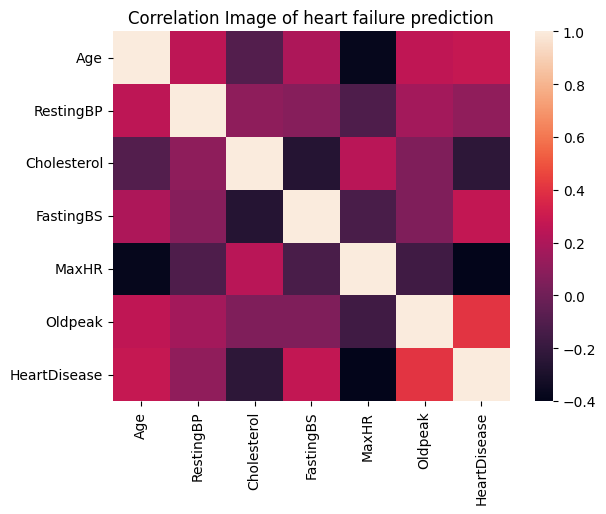

In [11]:
# We are gonna proceed further with Exploratory Data Analysis

#Necessary to remove correlated variables to improve the models.
cols=df[num_columns].columns.to_list()
cols.append('HeartDisease')
plt.title(label='Correlation Image of heart failure prediction')
sns.heatmap(df[cols].corr())
plt.show()
#to use plotly imap data should be 2D array to be plotted

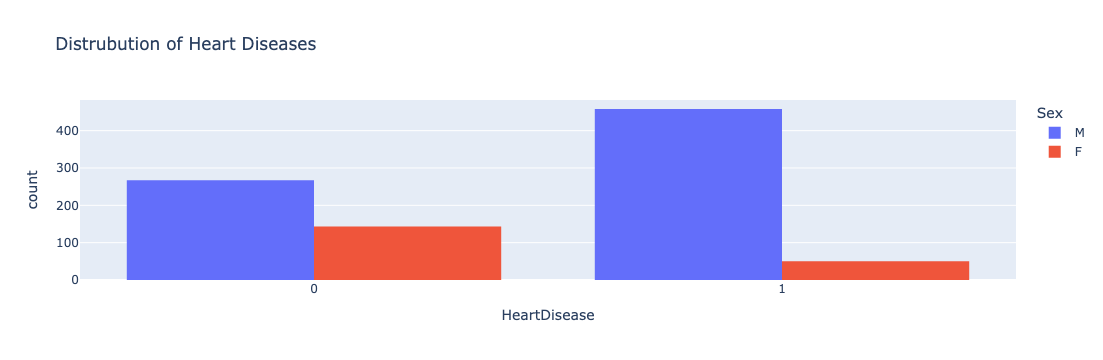

In [12]:
#How Heart disease is distrubuted with respect to male and females

px.histogram(df,x='HeartDisease',color='Sex',hover_data=df.columns,title="Distrubution of Heart Diseases",barmode='group')


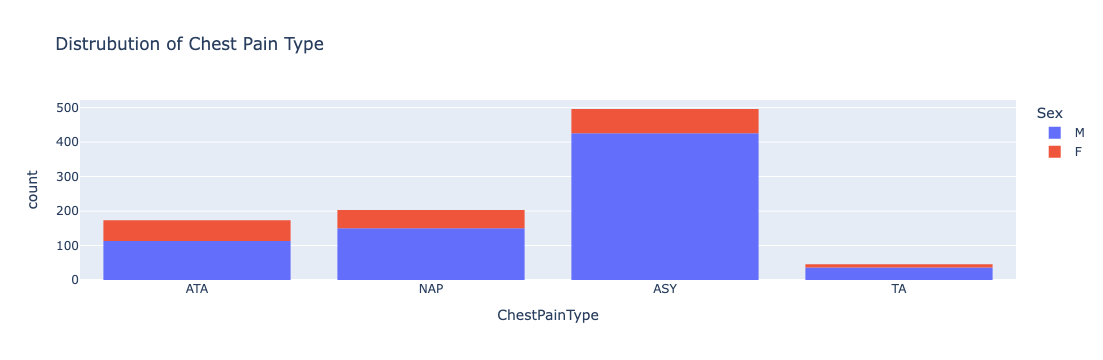

In [13]:
px.histogram(df,x='ChestPainType',title="Distrubution of Chest Pain Type",color='Sex')

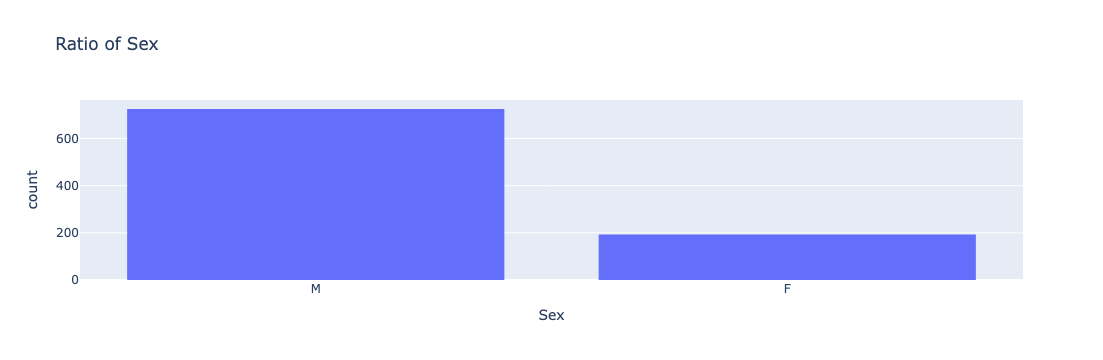

In [14]:
px.histogram(df,x='Sex',title='Ratio of Sex')

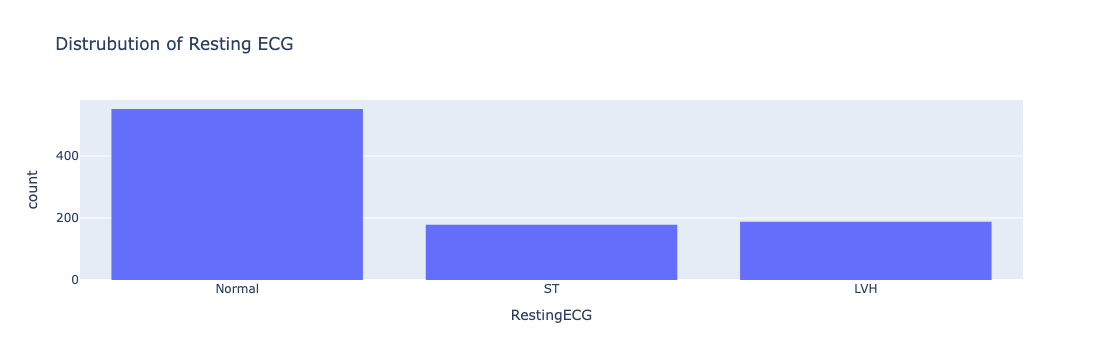

In [15]:
px.histogram(df,x='RestingECG',title='Distrubution of Resting ECG').show()


[]

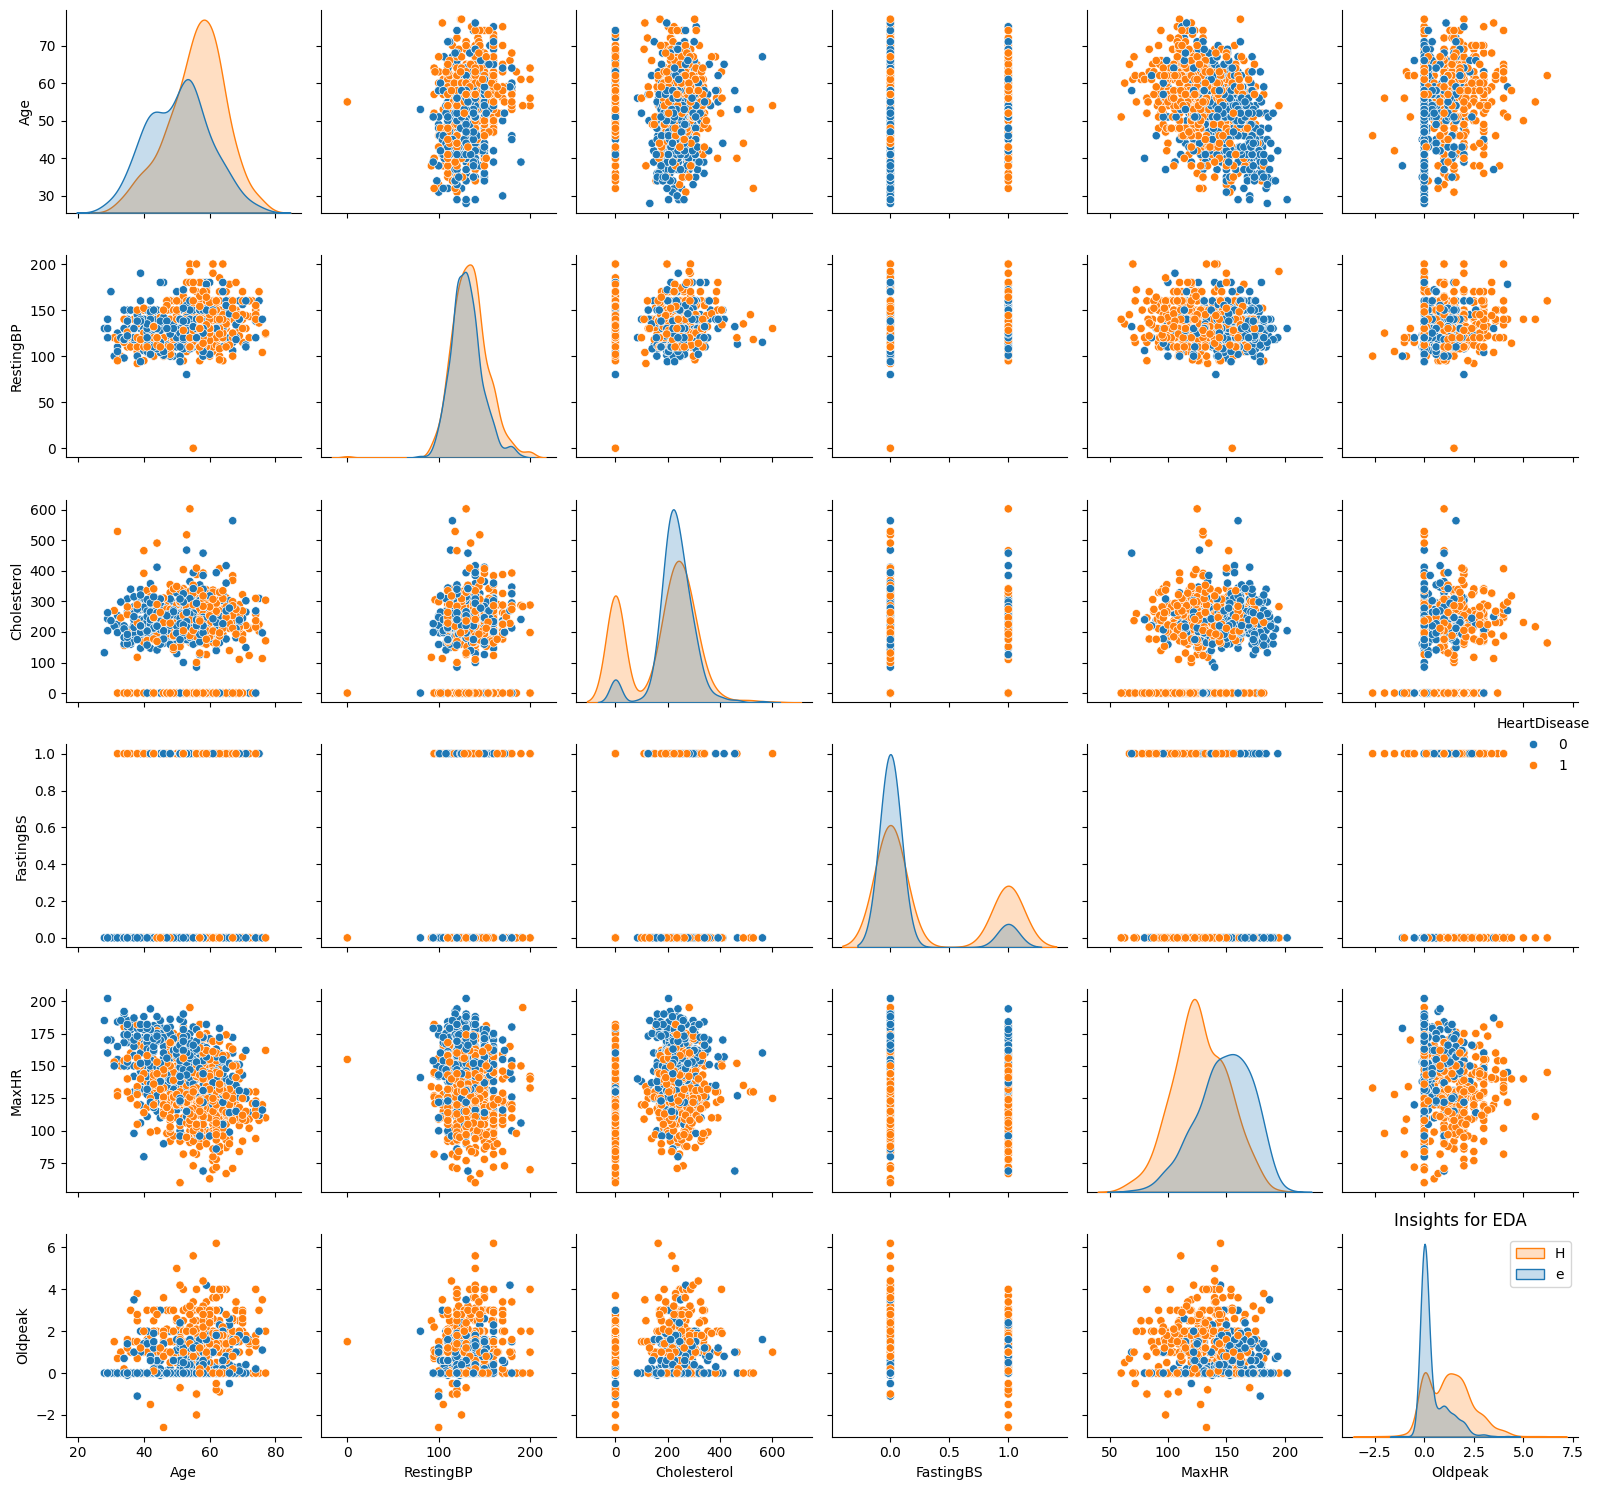

In [22]:
#sns pairplots used to create matrix of scatter plots to analyse pairwise relationship
sns.pairplot(df,hue='HeartDisease')
plt.title("Insights for EDA")
plt.legend('Heart Disease')
plt.tight_layout()
plt.plot()
#hue is used to add third dimension to the plot.enhances the plot by coloring data points according to categories withim the specified value

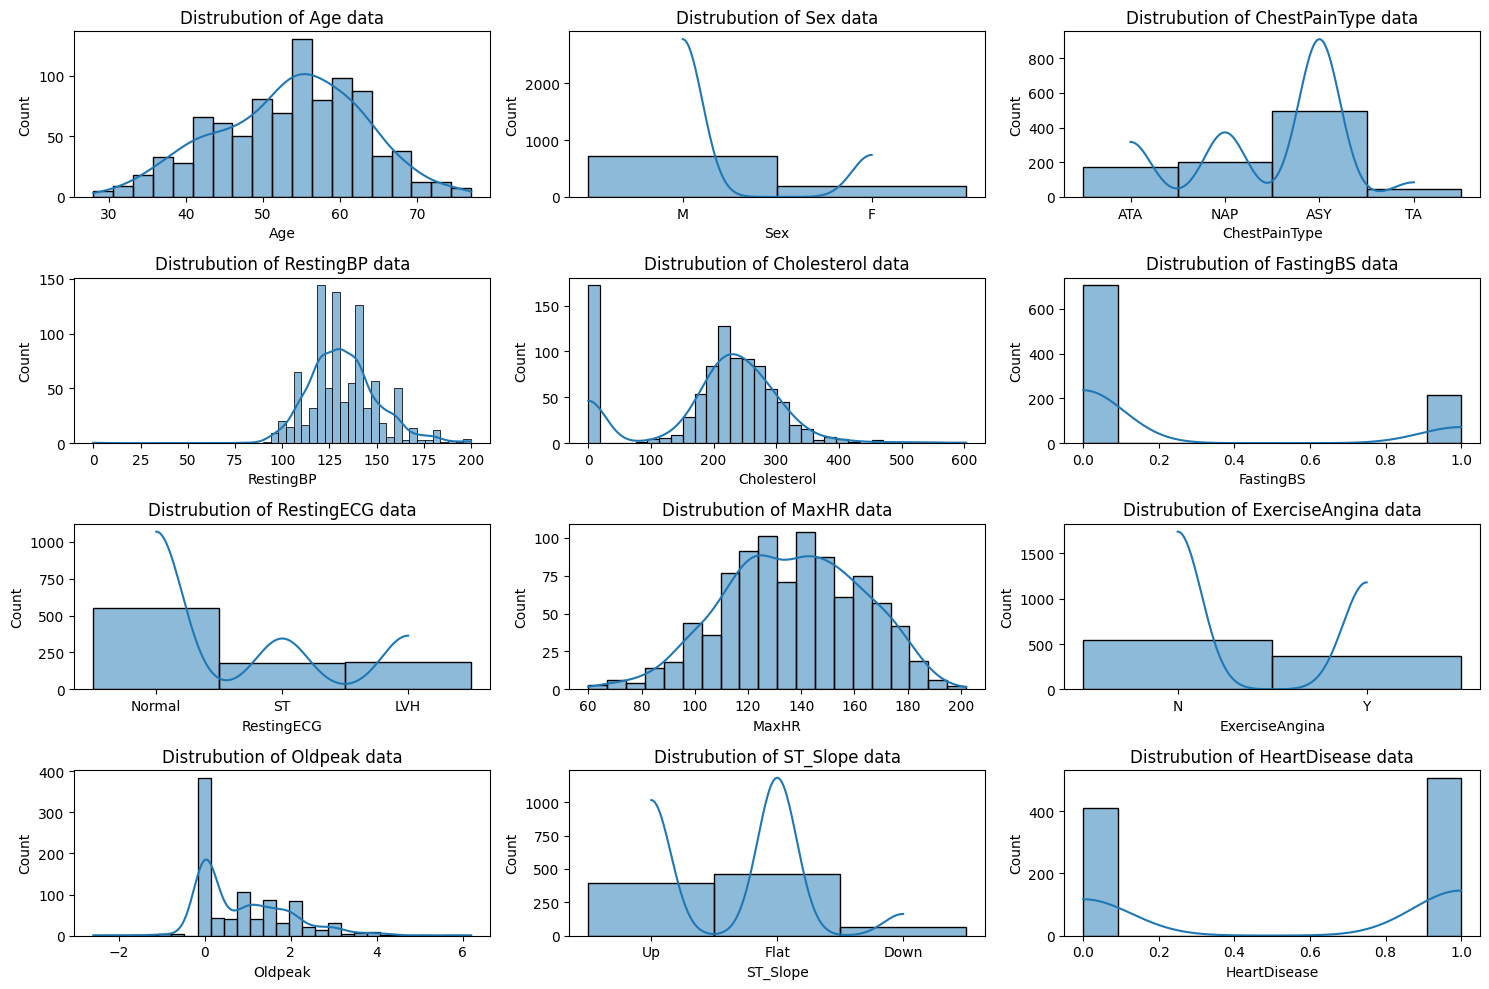

In [38]:
#Checking the Linearity of the features by plotting distrubution graph and look for skewness
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns,1):
    plt.subplot(4,3,i)#Subplot add axes to current figure
    plt.title(f'Distrubution of {col} data')
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()


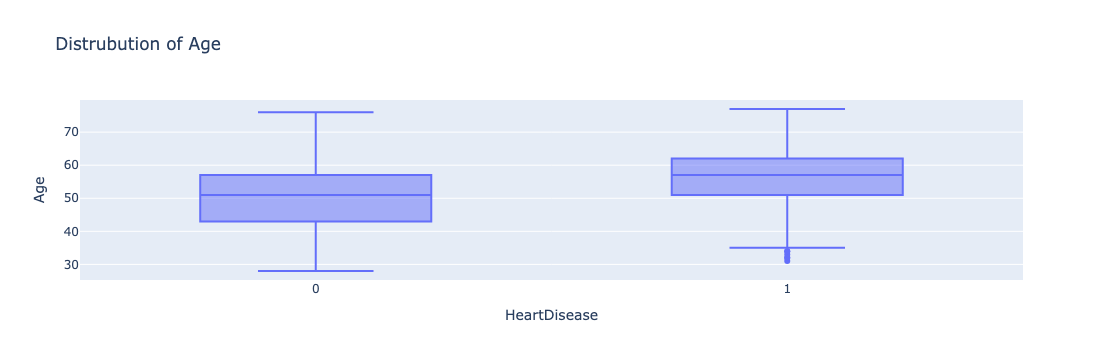

In [49]:
#Blox plot is used to show quantitative data. The box shows the quartiles while whiskers extend to show the rest of the distrubution
#inside the box is the median. whiskers shows the maximum and minimum
#if the data point are 1.5 times the inter quartile range then they are shown as dots , here meaning as the outliers
px.box(df,x='HeartDisease',y='Age',title='Distrubution of Age')

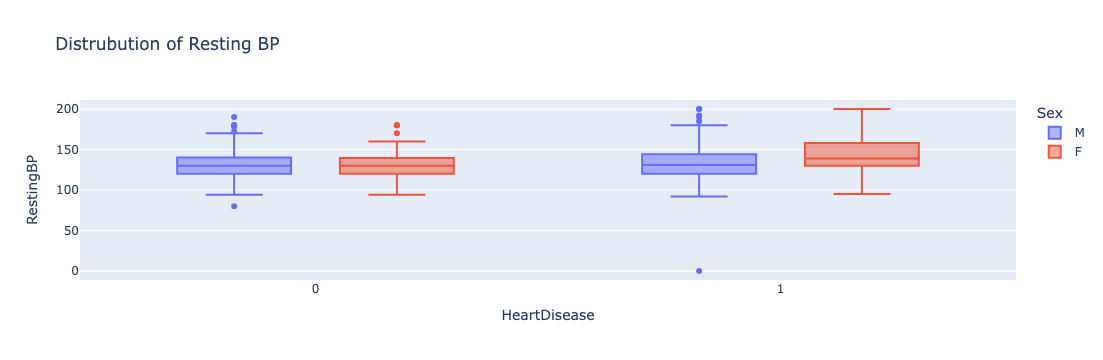

In [61]:

px.box(df,x='HeartDisease',y='RestingBP',title='Distrubution of Resting BP',color='Sex')

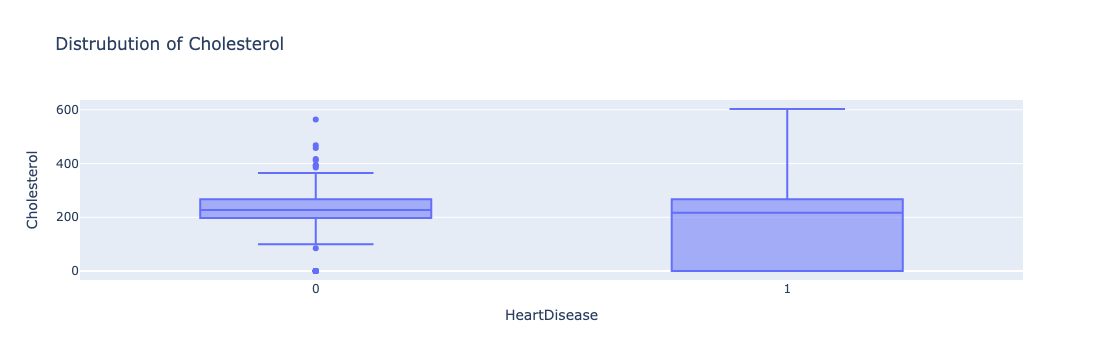

In [67]:
px.box(df,y='Cholesterol',x='HeartDisease',title="Distrubution of Cholesterol")

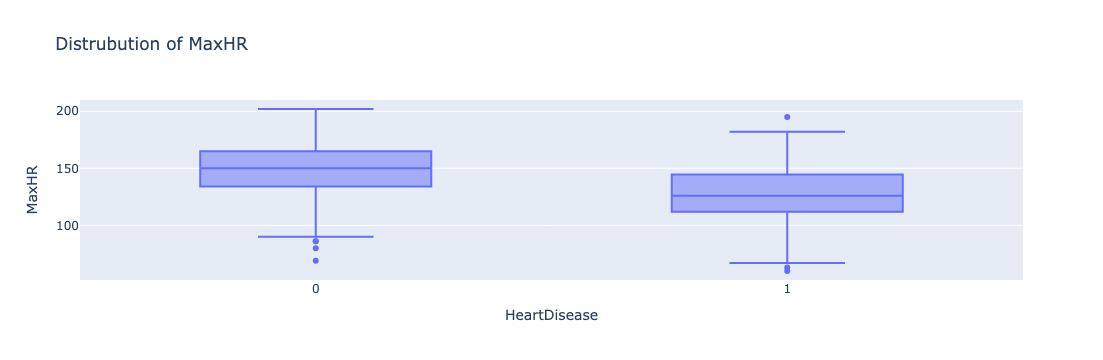

In [70]:
px.box(df,y='MaxHR',x="HeartDisease",title=f"Distrubution of MaxHR")

Data PreProcessing

In [74]:
#Checking for null values
df.isnull().sum()
#We don't need impuatation since there are no null values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

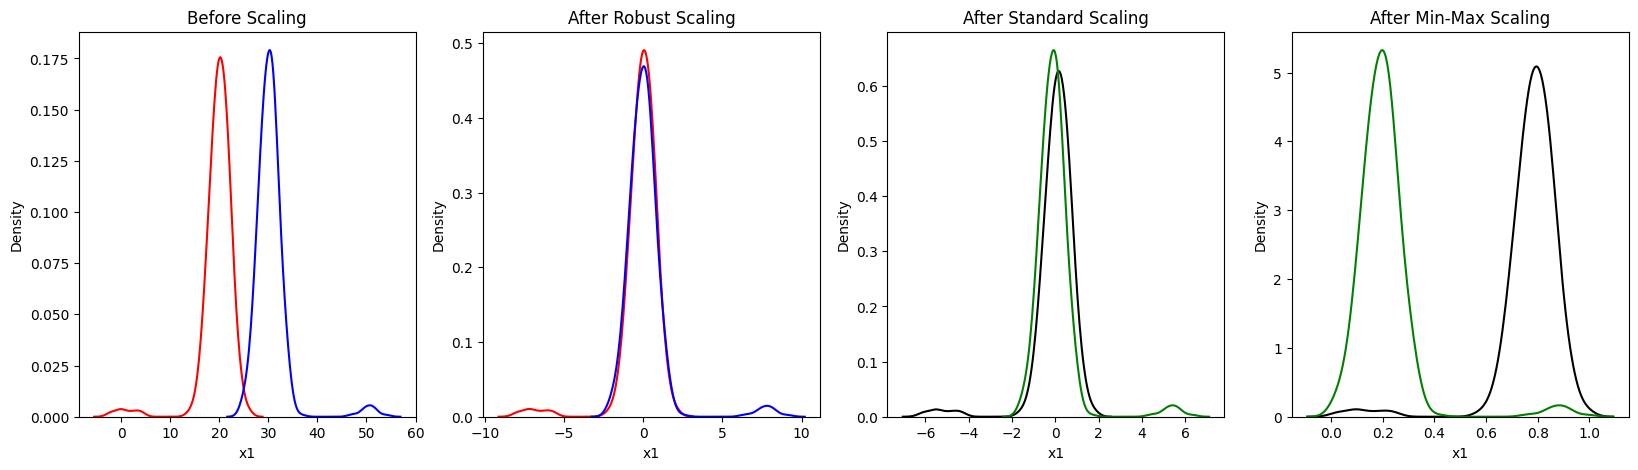

In [77]:
#We need to feature Scale because SVM and KNN or K-means are distanced based classifer of data points
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()